# Pandas crash course

## Set up

In [1]:
import pandas as pd

## Load data

We're going to use the Titanic dataset.

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv")

Let's check out the attributes in the dataset.

In [3]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [4]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


This dataset already has been preprocessed, please, observe that there are redundant attributes such as `survived` and `alive`, the first one being binary and the second one boolean.

## Dataset summaries

In [5]:
len(data) # Count rows

891

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null object
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null object
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.3+ KB


In [7]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data.groupby("class").describe()

age                                                       fare  \
        count       mean        std   min   25%   50%   75%   max  count   
class                                                                      
First   186.0  38.233441  14.802856  0.92  27.0  37.0  49.0  80.0  216.0   
Second  173.0  29.877630  14.001077  0.67  23.0  29.0  36.0  70.0  184.0   
Third   355.0  25.140620  12.495398  0.42  18.0  24.0  32.0  74.0  491.0   

                  ...  sibsp      survived                                     \
             mean ...    75%  max    count      mean       std  min  25%  50%   
class             ...                                                           
First   84.154687 ...    1.0  3.0    216.0  0.629630  0.484026  0.0  0.0  1.0   
Second  20.662183 ...    1.0  3.0    184.0  0.472826  0.500623  0.0  0.0  0.0   
Third   13.675550 ...    1.0  8.0    491.0  0.242363  0.428949  0.0  0.0  0.0   

                  
        75%  max  
class             
First   1.0  1.0  
Second  1.0  1.0  
Third   0.0  1.0  

[3 rows x 48 columns]

In [9]:
data['alive'].value_counts()

no     549
yes    342
Name: alive, dtype: int64

In [10]:
data['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [11]:
data['class'].nunique()

3

## Data selection by column

In [12]:
data["fare"];

In [13]:
data.fare;

In [14]:
data[["class", "sex", "fare"]];

In [15]:
data.loc[:,'age':'fare'].head()

,age,sibsp,parch,fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500


In [16]:
data.iloc[:,[1,2,5]]; # Returns columns 1, 2 and 5

In [17]:
data.loc[data['age'] < 10, ['class','sex']];

In [18]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [19]:
data.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


## Data selection by row

In [20]:
data[data['class'] == "First"];

In [21]:
data[data['age'] < 30];

In [22]:
data.drop_duplicates();

In [23]:
data.iloc[5:10]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [24]:
data.nlargest(3, "age")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
630,1,1,male,80.0,0,0,30.0000,S,First,man,True,A,Southampton,yes,True
851,0,3,male,74.0,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True


In [25]:
data.nsmallest(3, "age")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
803,1,3,male,0.42,0,1,8.5167,C,Third,child,False,NaN,Cherbourg,yes,False
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,NaN,Southampton,yes,False
469,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False


In [26]:
data.query("(age > 10) and (age < 15)")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
39,1,3,female,14.0,1,0,11.2417,C,Third,child,False,NaN,Cherbourg,yes,False
59,0,3,male,11.0,5,2,46.9000,S,Third,child,False,NaN,Southampton,no,False
111,0,3,female,14.5,1,0,14.4542,C,Third,child,False,NaN,Cherbourg,no,False
125,1,3,male,12.0,1,0,11.2417,C,Third,child,False,NaN,Cherbourg,yes,False
435,1,1,female,14.0,1,2,120.0000,S,First,child,False,B,Southampton,yes,False
446,1,2,female,13.0,0,1,19.5000,S,Second,child,False,NaN,Southampton,yes,False
542,0,3,female,11.0,4,2,31.2750,S,Third,child,False,NaN,Southampton,no,False
683,0,3,male,14.0,5,2,46.9000,S,Third,child,False,NaN,Southampton,no,False


## Missing data

In [27]:
data['deck'].isna().sum()

688

In [28]:
print("Rows: {}".format(len(data)))
cleanData = data.dropna()
print("Rows: {}".format(len(cleanData)))

Rows: 891
Rows: 182


In [29]:
print(data['deck'].head())
cleanData = data.fillna("FILLED")
print(cleanData['deck'].head())

0    NaN
1      C
2    NaN
3      C
4    NaN
Name: deck, dtype: object
0    FILLED
1         C
2    FILLED
3         C
4    FILLED
Name: deck, dtype: object


## Make new columns

In [30]:
data['sibilings'] = data['sibsp'] + data['parch']
data[data['sibilings'] > 1].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sibilings
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,4
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,2
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False,2
13,0,3,male,39.0,1,5,31.2750,S,Third,man,True,NaN,Southampton,no,False,6
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False,5


## Delete rows and columns

In [31]:
clean = data.drop('sibilings', axis=1); # Delete column
print(data.columns)
print(clean.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'sibilings'],
      dtype='object')
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [32]:
data.drop('sibilings', axis=1, inplace=True); # Delete column in the same dataframe
print(data.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [33]:
data.drop(['sibsp', 'parch'], axis=1); # Delete several columns

In [34]:
data.drop([10,12,20], axis=0); # Delete several rows

## Group data

In [35]:
data.groupby('class').describe()

age                                                       fare  \
        count       mean        std   min   25%   50%   75%   max  count   
class                                                                      
First   186.0  38.233441  14.802856  0.92  27.0  37.0  49.0  80.0  216.0   
Second  173.0  29.877630  14.001077  0.67  23.0  29.0  36.0  70.0  184.0   
Third   355.0  25.140620  12.495398  0.42  18.0  24.0  32.0  74.0  491.0   

                  ...  sibsp      survived                                     \
             mean ...    75%  max    count      mean       std  min  25%  50%   
class             ...                                                           
First   84.154687 ...    1.0  3.0    216.0  0.629630  0.484026  0.0  0.0  1.0   
Second  20.662183 ...    1.0  3.0    184.0  0.472826  0.500623  0.0  0.0  0.0   
Third   13.675550 ...    1.0  8.0    491.0  0.242363  0.428949  0.0  0.0  0.0   

                  
        75%  max  
class             
First   1.0  1.0  
Second  1.0  1.0  
Third   0.0  1.0  

[3 rows x 48 columns]

In [36]:
data.groupby('class').describe().T

class                First      Second       Third
age      count  186.000000  173.000000  355.000000
         mean    38.233441   29.877630   25.140620
         std     14.802856   14.001077   12.495398
         min      0.920000    0.670000    0.420000
         25%     27.000000   23.000000   18.000000
         50%     37.000000   29.000000   24.000000
         75%     49.000000   36.000000   32.000000
         max     80.000000   70.000000   74.000000
fare     count  216.000000  184.000000  491.000000
         mean    84.154687   20.662183   13.675550
         std     78.380373   13.417399   11.778142
         min      0.000000    0.000000    0.000000
         25%     30.923950   13.000000    7.750000
         50%     60.287500   14.250000    8.050000
         75%     93.500000   26.000000   15.500000
         max    512.329200   73.500000   69.550000
parch    count  216.000000  184.000000  491.000000
         mean     0.356481    0.380435    0.393075
         std      0.693997    0.690963    0.888861
         min      0.000000    0.000000    0.000000
         25%      0.000000    0.000000    0.000000
         50%      0.000000    0.000000    0.000000
         75%      0.000000    1.000000    0.000000
         max      4.000000    3.000000    6.000000
pclass   count  216.000000  184.000000  491.000000
         mean     1.000000    2.000000    3.000000
         std      0.000000    0.000000    0.000000
         min      1.000000    2.000000    3.000000
         25%      1.000000    2.000000    3.000000
         50%      1.000000    2.000000    3.000000
         75%      1.000000    2.000000    3.000000
         max      1.000000    2.000000    3.000000
sibsp    count  216.000000  184.000000  491.000000
         mean     0.416667    0.402174    0.615071
         std      0.611898    0.601633    1.374883
         min      0.000000    0.000000    0.000000
         25%      0.000000    0.000000    0.000000
         50%      0.000000    0.000000    0.000000
         75%      1.000000    1.000000    1.000000
         max      3.000000    3.000000    8.000000
survived count  216.000000  184.000000  491.000000
         mean     0.629630    0.472826    0.242363
         std      0.484026    0.500623    0.428949
         min      0.000000    0.000000    0.000000
         25%      0.000000    0.000000    0.000000
         50%      1.000000    0.000000    0.000000
         75%      1.000000    1.000000    0.000000
         max      1.000000    1.000000    1.000000

In [37]:
data.groupby('class').describe(include="all").T

class                 First    Second     Third
adult_male count        216       184       491
           unique         2         2         2
           top         True      True      True
           freq         119        99       319
           mean         NaN       NaN       NaN
           std          NaN       NaN       NaN
           min          NaN       NaN       NaN
           25%          NaN       NaN       NaN
           50%          NaN       NaN       NaN
           75%          NaN       NaN       NaN
           max          NaN       NaN       NaN
age        count        186       173       355
           unique       NaN       NaN       NaN
           top          NaN       NaN       NaN
           freq         NaN       NaN       NaN
           mean     38.2334   29.8776   25.1406
           std      14.8029   14.0011   12.4954
           min         0.92      0.67      0.42
           25%           27        23        18
           50%           37        29        24
           75%           49        36        32
           max           80        70        74
alive      count        216       184       491
           unique         2         2         2
           top          yes        no        no
           freq         136        97       372
           mean         NaN       NaN       NaN
           std          NaN       NaN       NaN
           min          NaN       NaN       NaN
           25%          NaN       NaN       NaN
...                     ...       ...       ...
sibsp      freq         NaN       NaN       NaN
           mean    0.416667  0.402174  0.615071
           std     0.611898  0.601633   1.37488
           min            0         0         0
           25%            0         0         0
           50%            0         0         0
           75%            1         1         1
           max            3         3         8
survived   count        216       184       491
           unique       NaN       NaN       NaN
           top          NaN       NaN       NaN
           freq         NaN       NaN       NaN
           mean     0.62963  0.472826  0.242363
           std     0.484026  0.500623  0.428949
           min            0         0         0
           25%            0         0         0
           50%            1         0         0
           75%            1         1         0
           max            1         1         1
who        count        216       184       491
           unique         3         3         3
           top          man       man       man
           freq         119        99       319
           mean         NaN       NaN       NaN
           std          NaN       NaN       NaN
           min          NaN       NaN       NaN
           25%          NaN       NaN       NaN
           50%          NaN       NaN       NaN
           75%          NaN       NaN       NaN
           max          NaN       NaN       NaN

[154 rows x 3 columns]

## Plots

First we must prepare the graphical device.

In [38]:
%matplotlib inline

We are ready to plot.

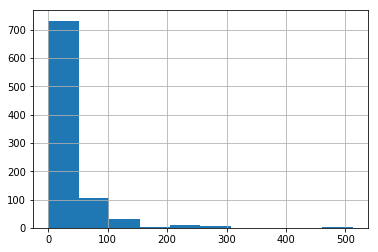

In [39]:
data['fare'].hist()

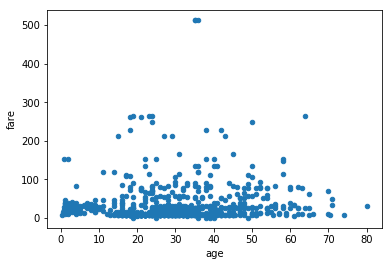

In [40]:
data.plot.scatter(x="age", y="fare")